In [1]:
import numpy as np
import matplotlib.pyplot as plt
from my_functions import *

In [2]:
## Load the catalog
cat = load_cat_photoz_gaia('csv/minijpas.flambda_photoz_gaia.csv')

In [3]:
tcurves = load_tcurves(load_filter_tags())

In [4]:
# Define the array of the filters we are going to use // gSDSS band
nb_ind_arr = [8, 9, 10, 11, 12, 13, 14, 15]
bb_ind = -3

In [5]:
# Function to drop sources
def make_masks(cat, nb_ind):
    # Mask sources with high photoz odds
    mask_pz_odds = cat['odds'] < 0.98
    # Mask sources with proper motion according to Gaia (sigma > 3)
    parallax_sn = np.abs(cat['parallax'] / cat['parallax_err'])
    pmra_sn = np.abs(cat['pmra'] / cat['pmra_err'])
    pmdec_sn = np.abs(cat['pmdec'] / cat['pmdec_err'])
    mask_pmotion = (
        (np.sqrt(parallax_sn**2 + pmra_sn**2 + pmdec_sn**2) < 27.**0.5)
        | ( np.isnan(parallax_sn) | np.isnan(pmra_sn) | np.isnan(pmdec_sn) )
    )
    # Mask sources with SNR < 5 in the selected NB
    mask_snr = cat['flx_err'][:,nb_ind] < 0.2
    
    mask_total = mask_pz_odds & mask_pmotion & mask_snr
    return mask_total

In [10]:
nb_ind = 9
mask = make_masks(cat, nb_ind)
pm_flx = cat['flx'][mask] * 1e-19
pm_err = cat['flx_err'][mask] * pm_flx
fwhm_nb = nb_fwhm(tcurves, nb_ind, True)
w_central = np.array(central_wavelength(load_tcurves(load_filter_tags())))
N_nb = 9 # Number of nb on each side of the central one
line, cf = nbex_cont_estimate(pm_flx, pm_err, nb_ind, w_central, N_nb, 50, fwhm_nb)

In [11]:
len(np.where(line)[0])

66

In [12]:
bb_fwhm = [
    nb_fwhm(tcurves, -4, True),
    nb_fwhm(tcurves, -3, True),
    nb_fwhm(tcurves, -2, True),
    nb_fwhm(tcurves, -1, True)
]

240601883


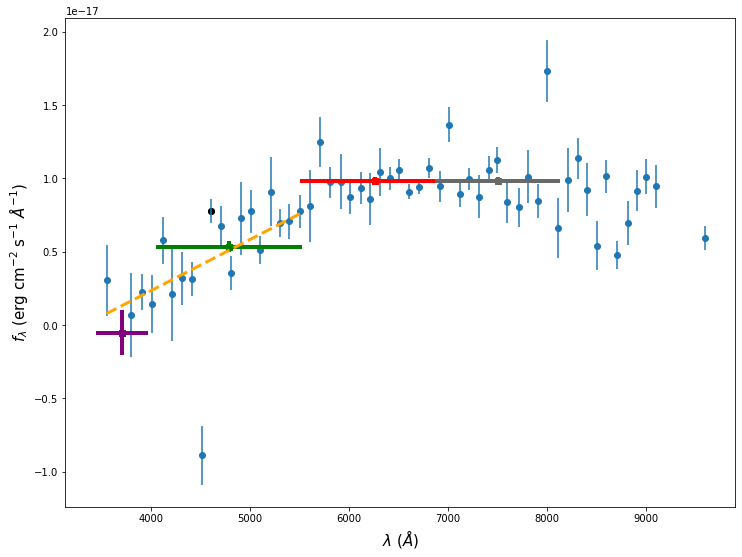

240602173


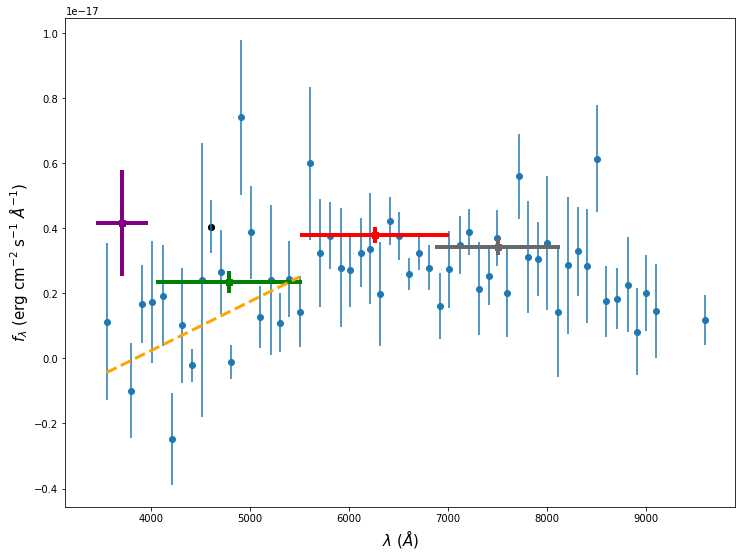

240602653


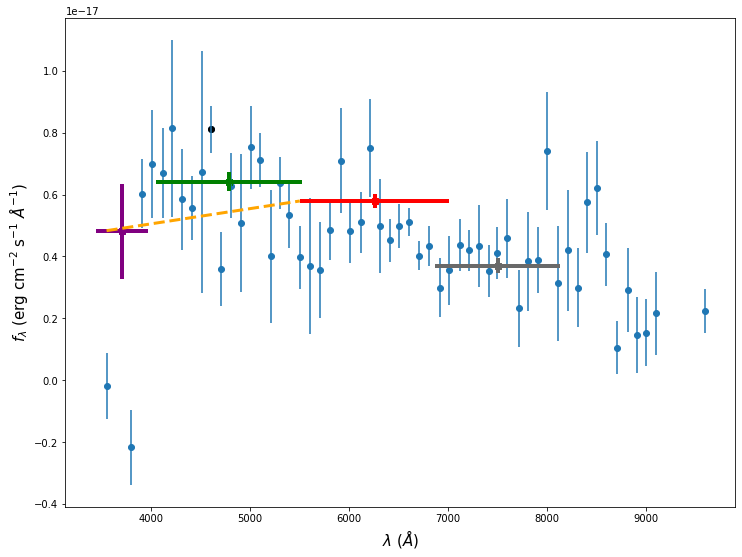

224100574


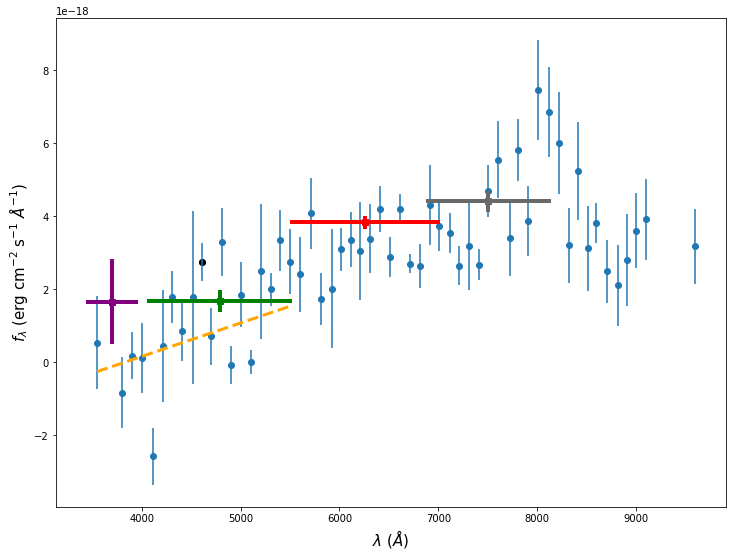

240602797


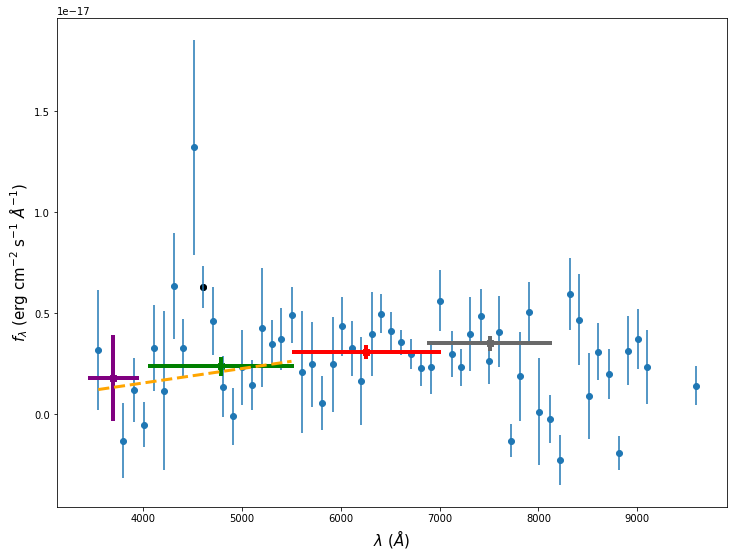

240602969


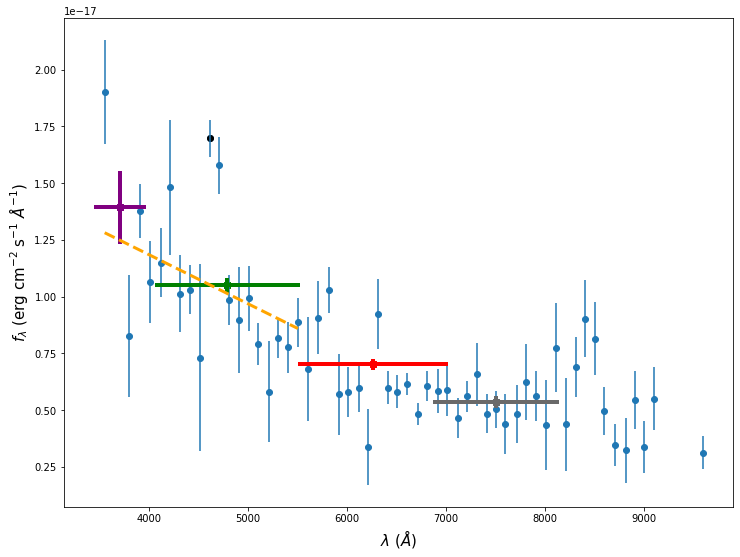

240603282


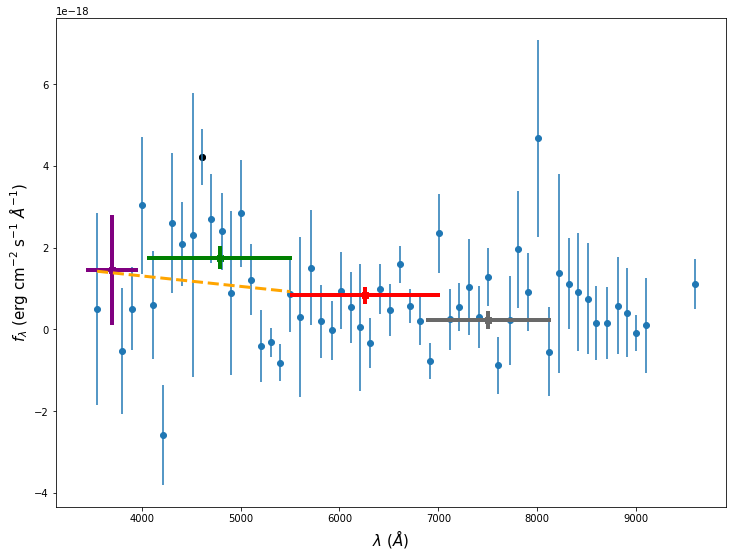

240603369


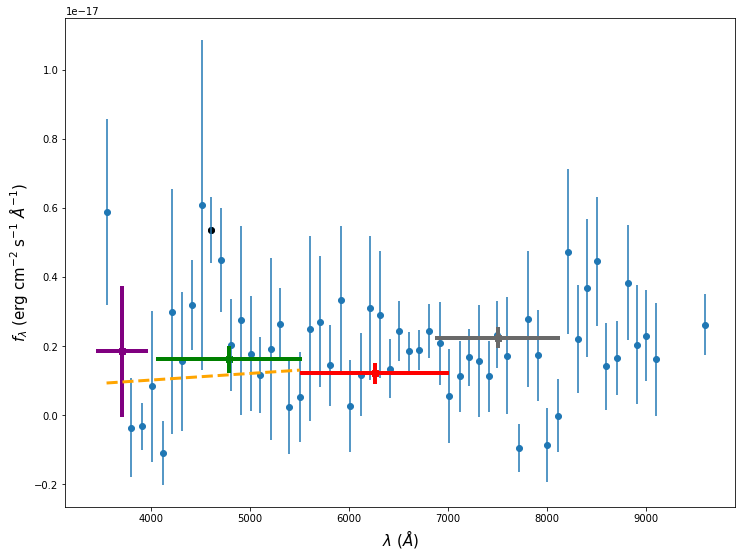

240603467


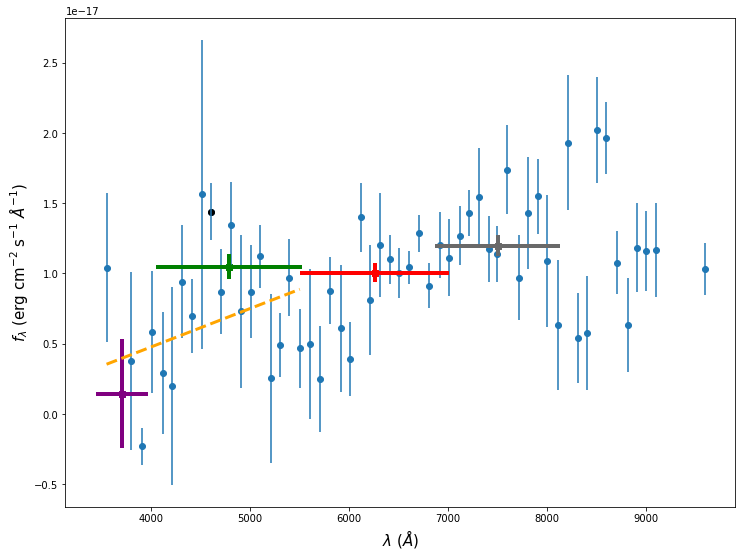

240603657


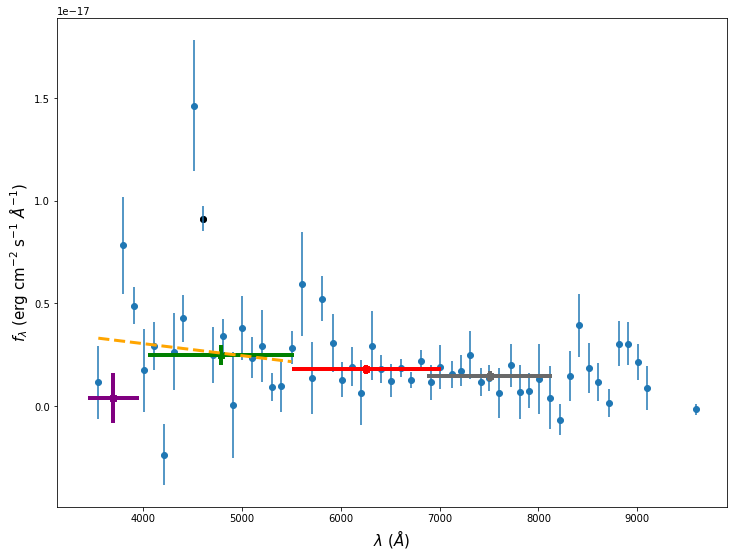

224102627


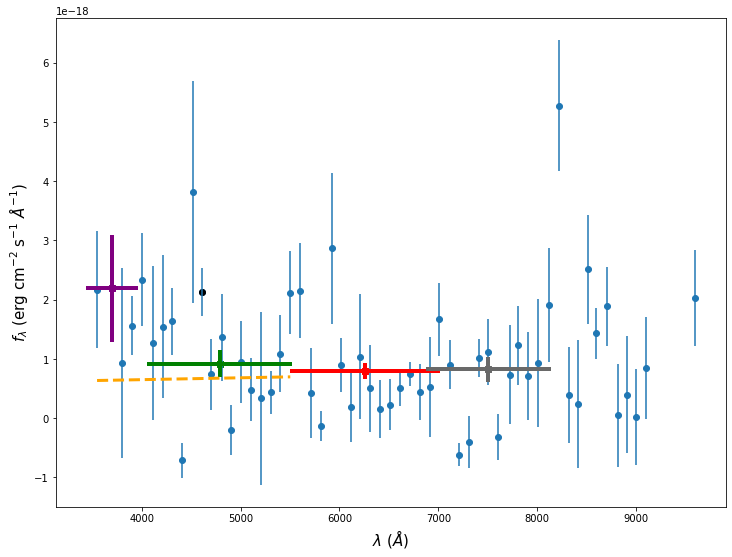

224105619


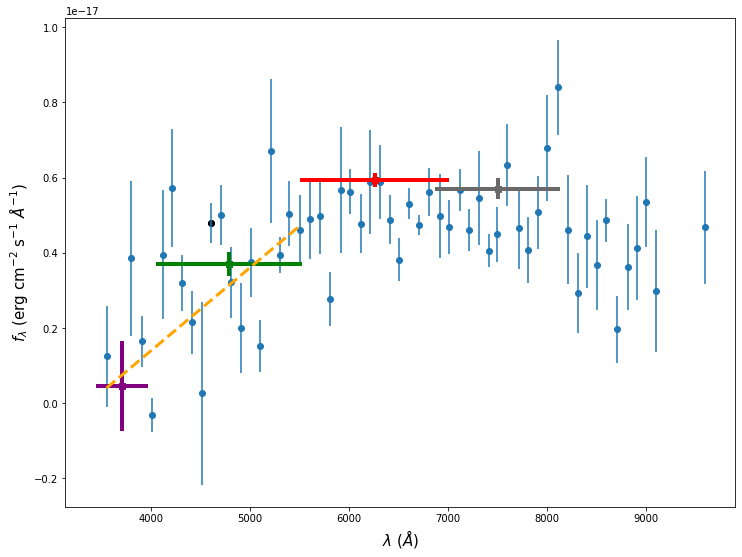

224105799


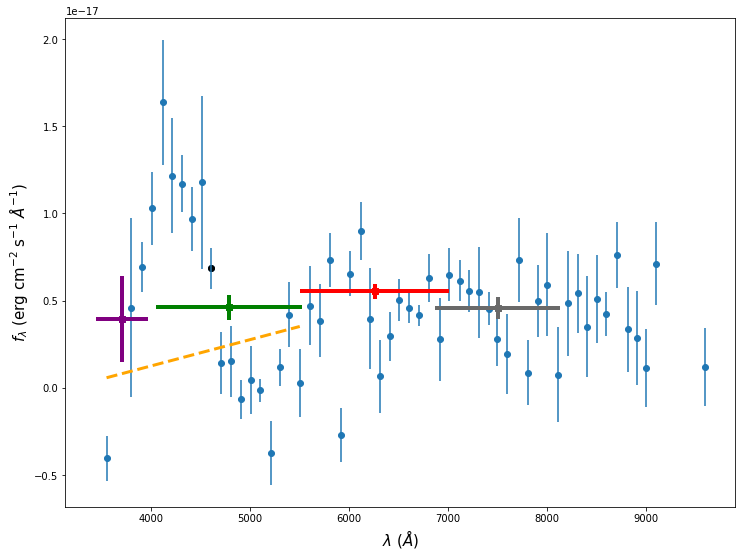

224106636


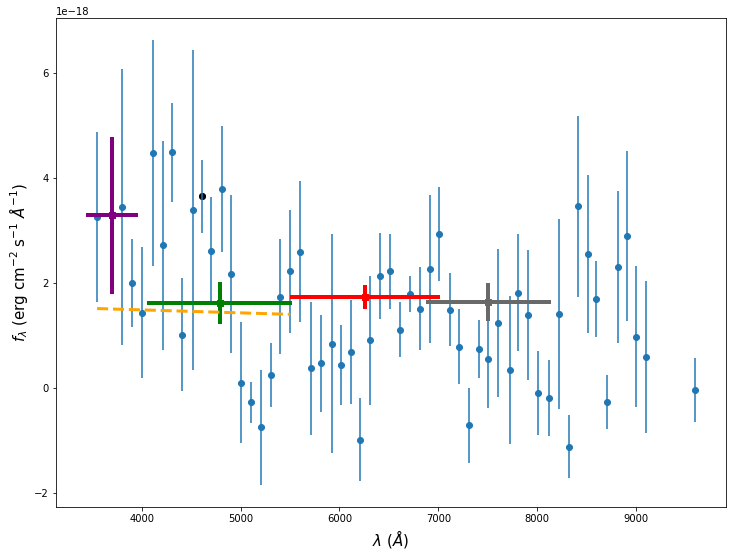

224106669


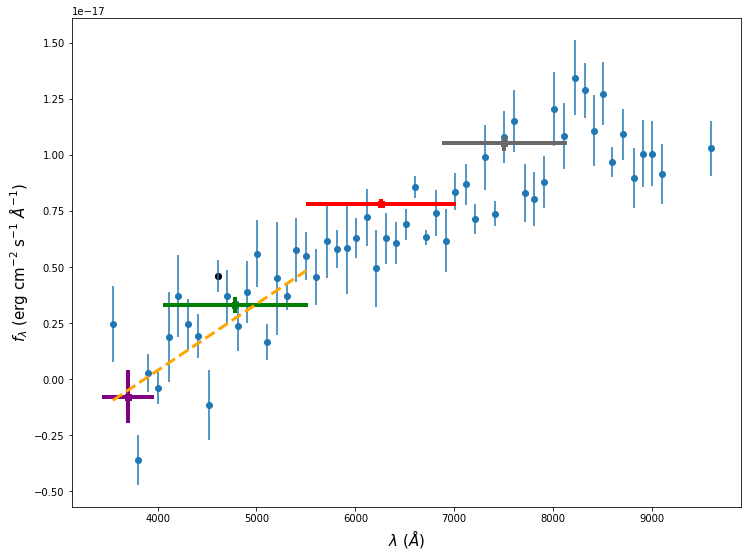

240609048


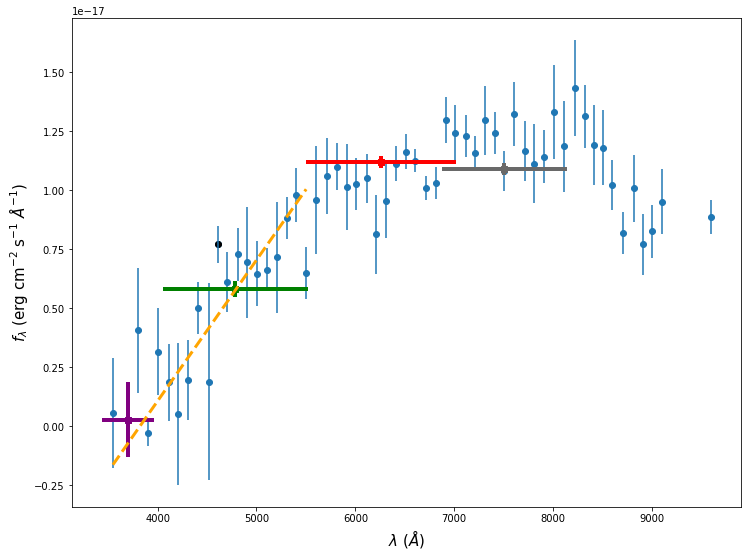

240609366


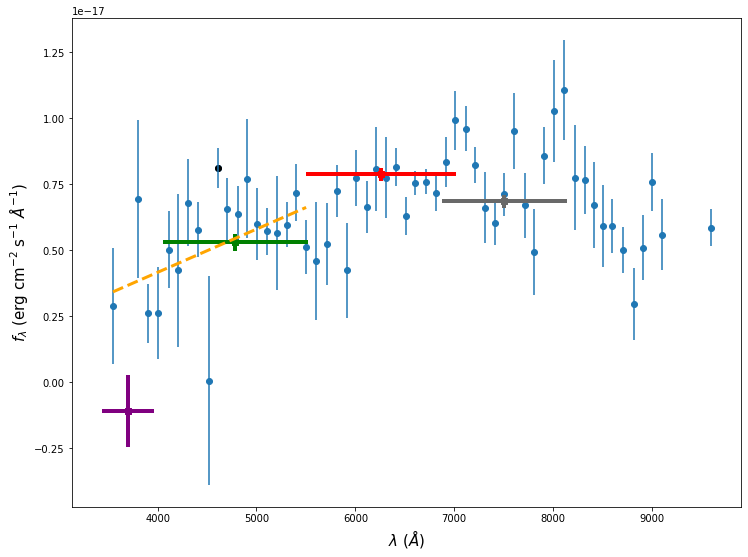

240609539


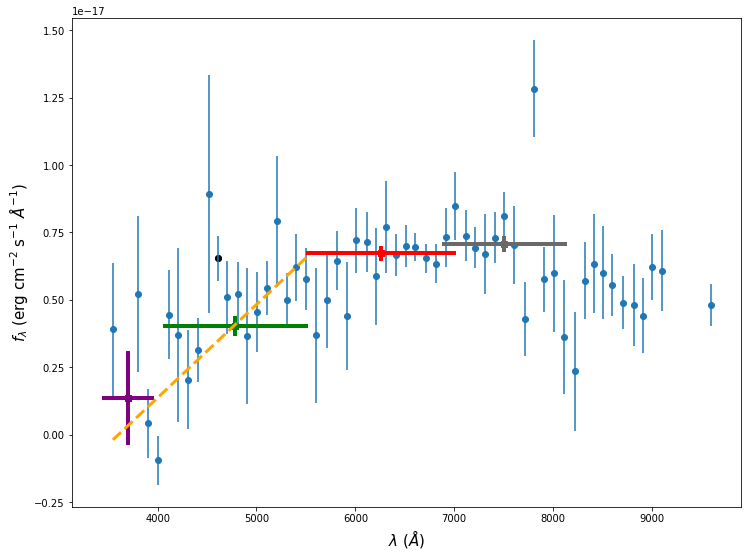

224107775


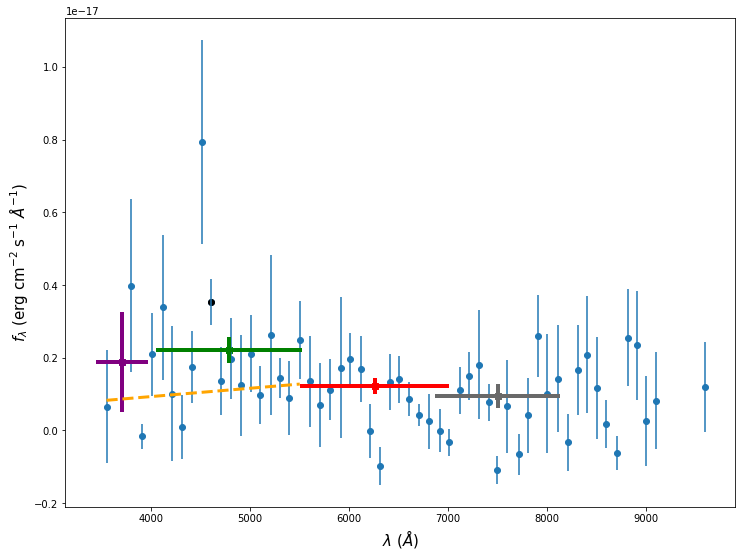

224107821


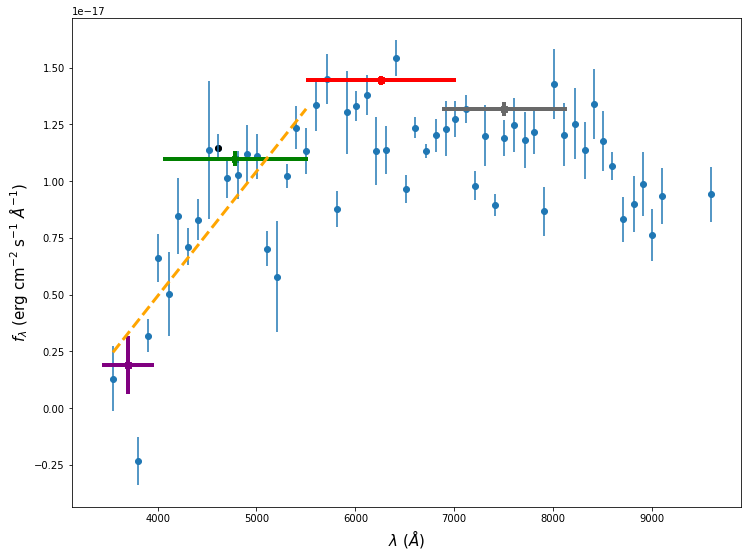

240610129


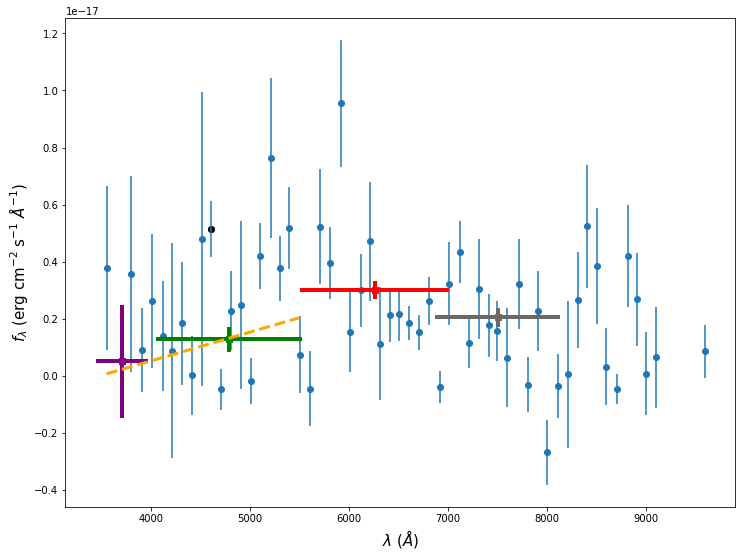

240610745


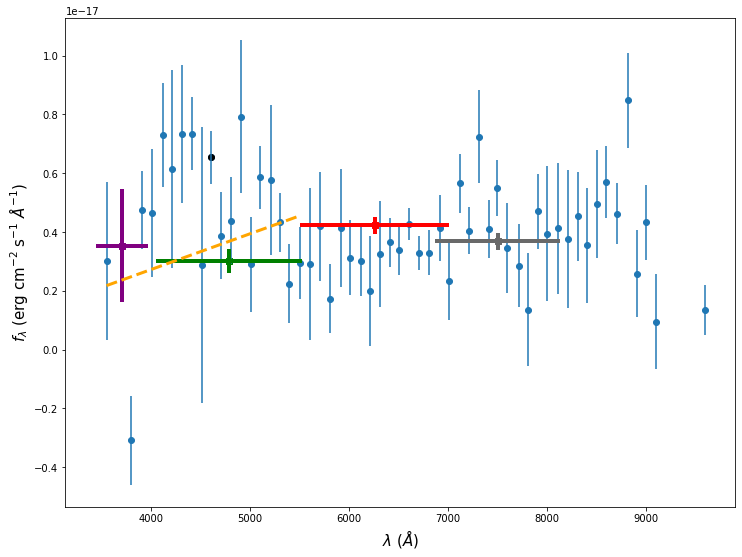

224108716


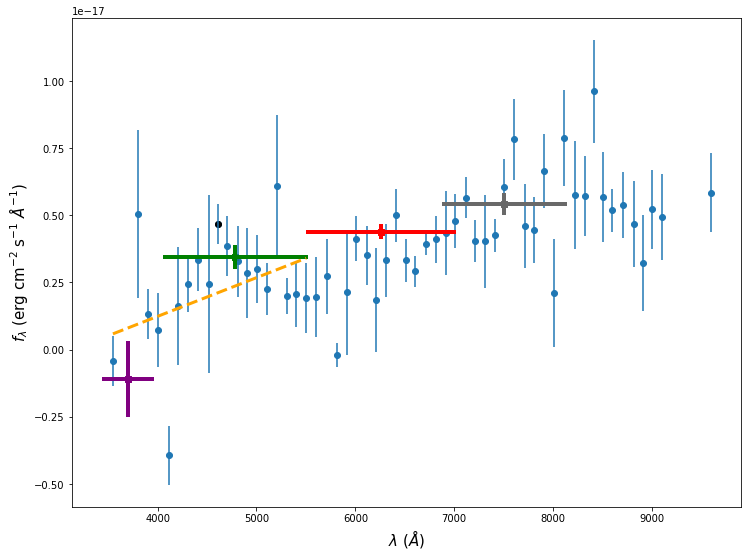

240611052


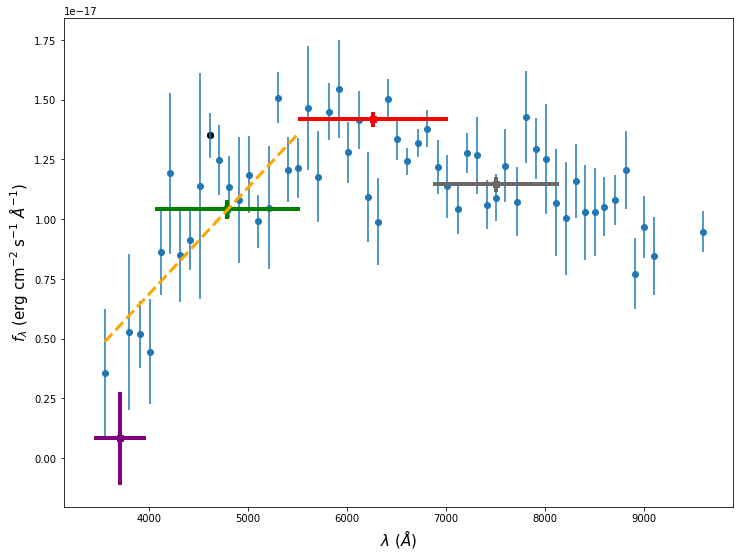

240612148


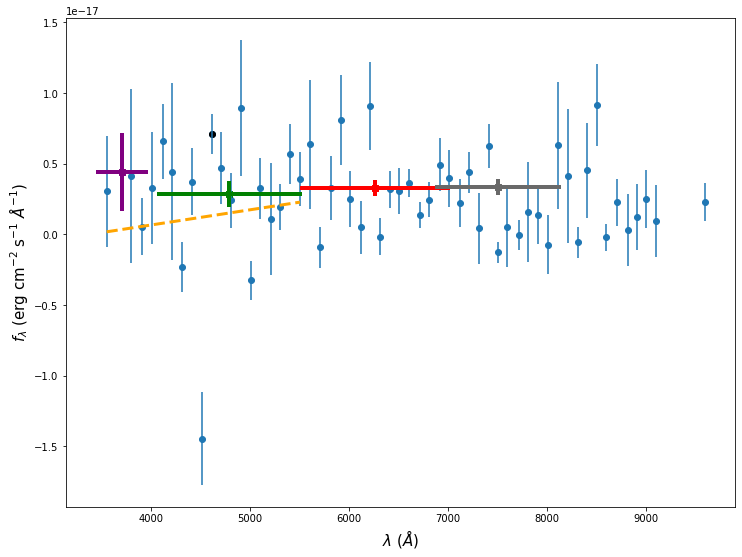

247000707


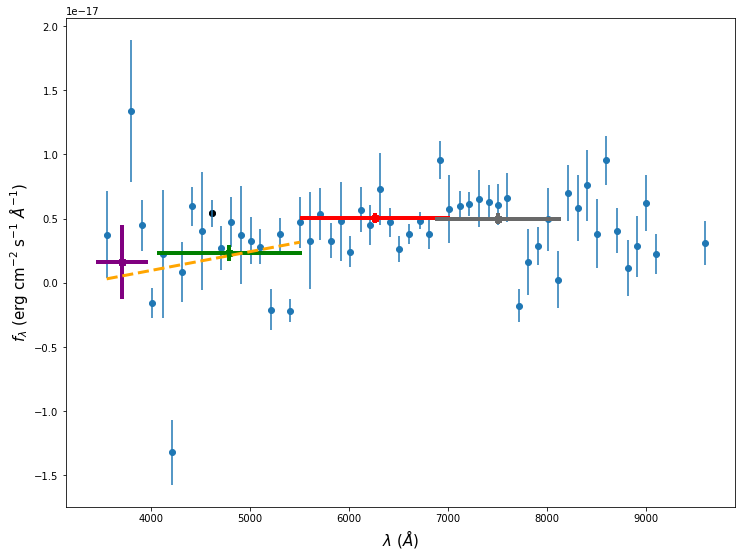

240612325


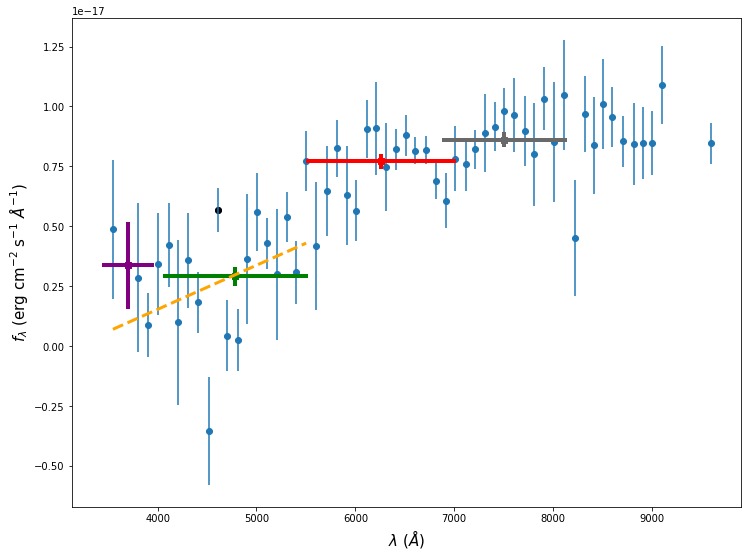

240612528


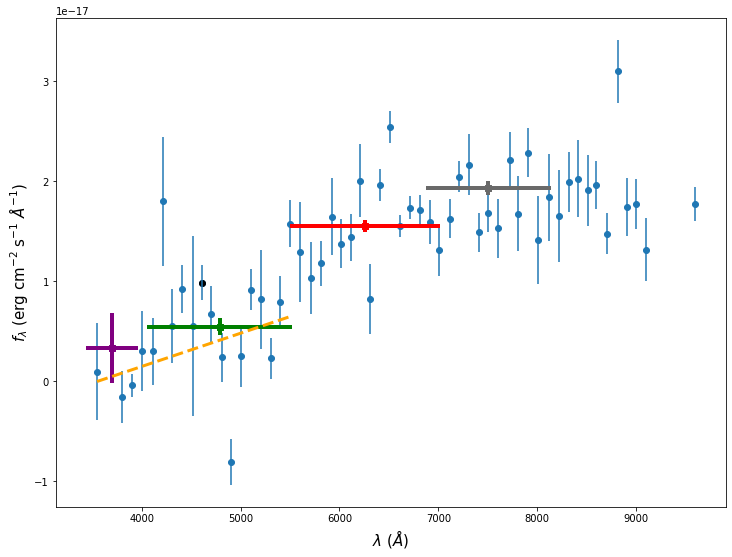

247001195


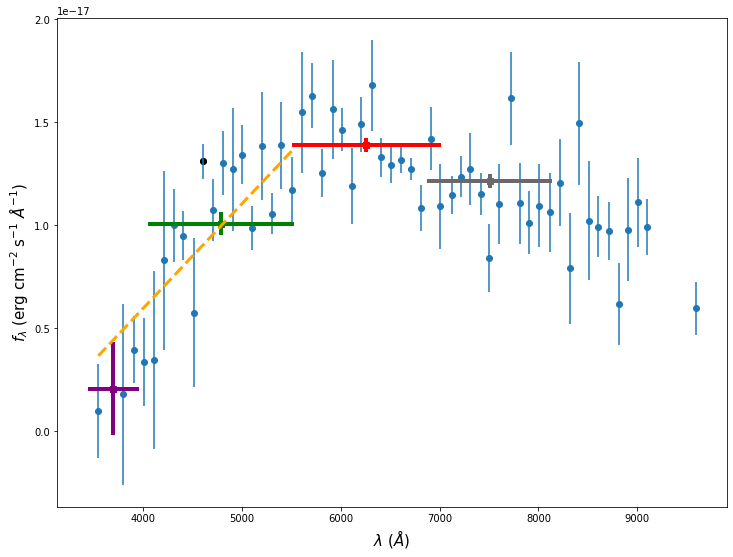

240612887


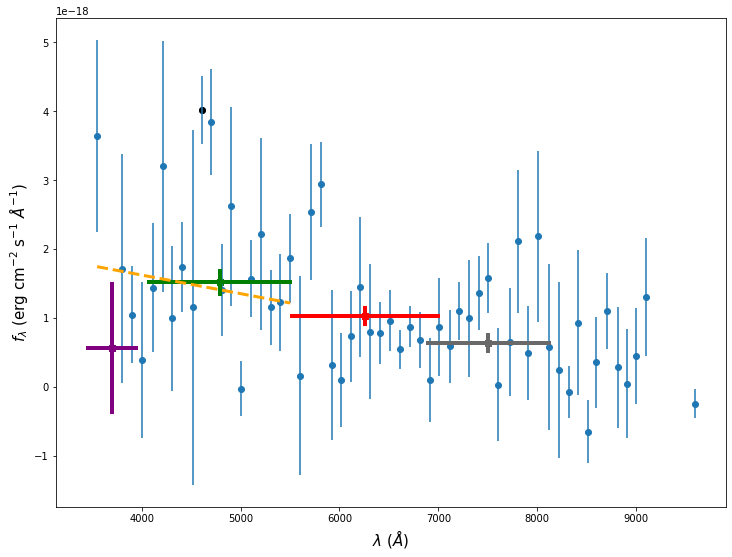

247001663


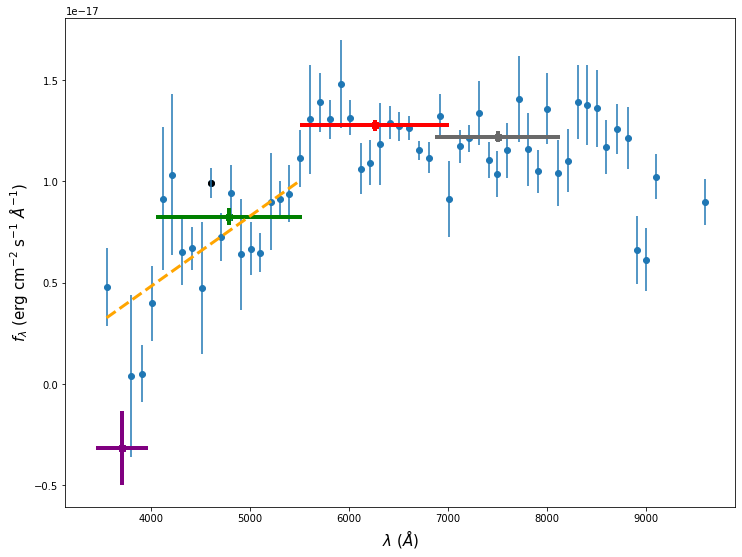

224110971


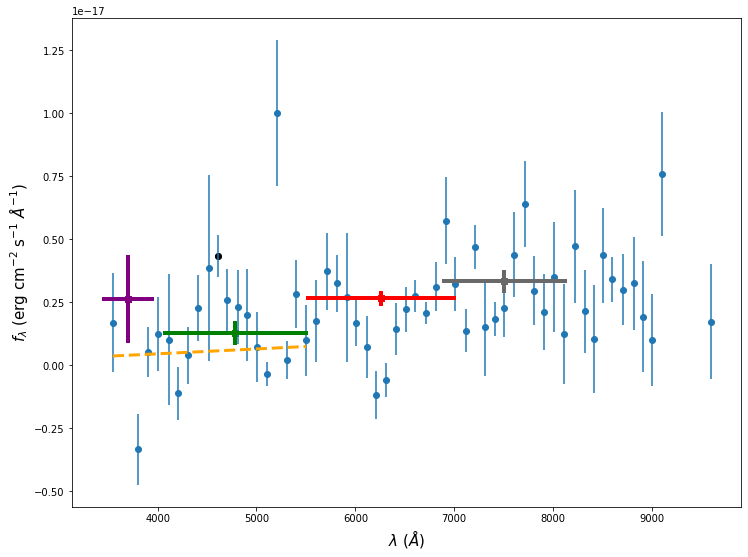

247001901


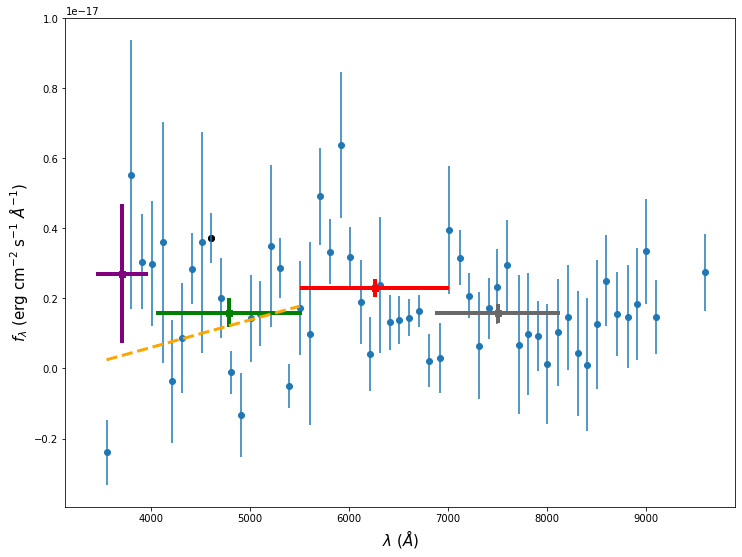

247002010


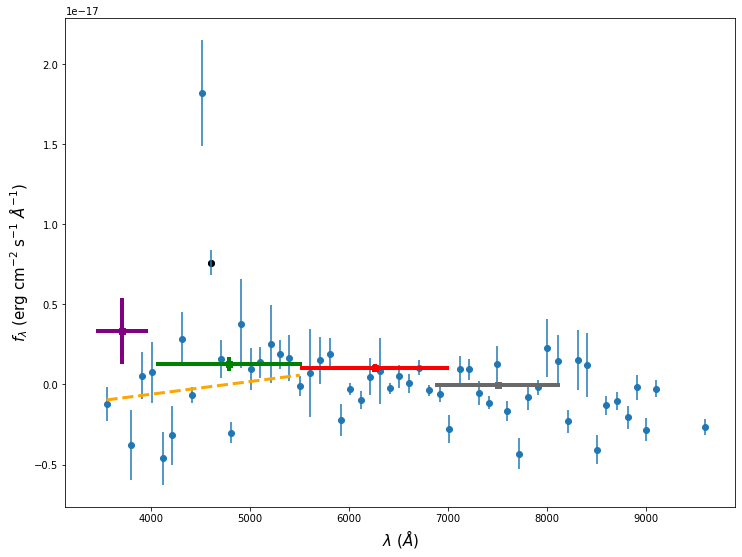

247002032


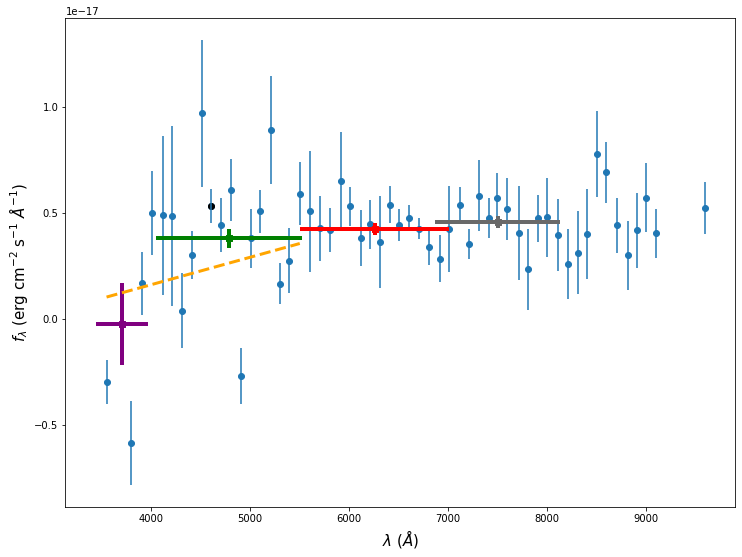

247002216


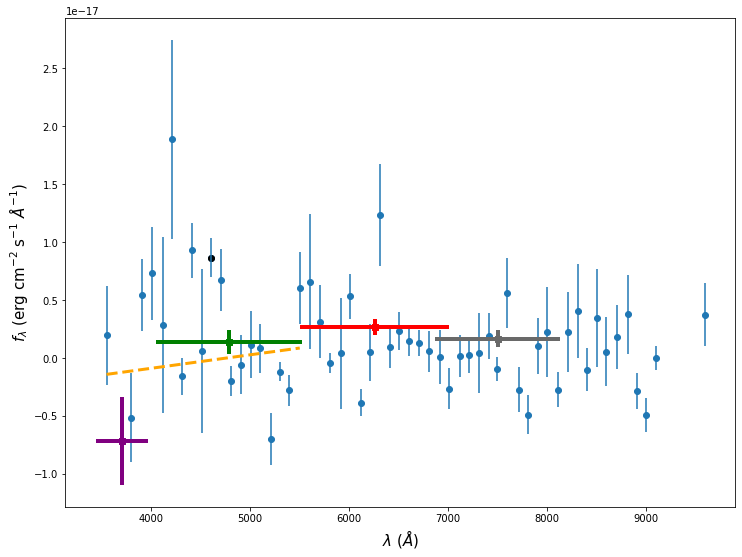

240613871


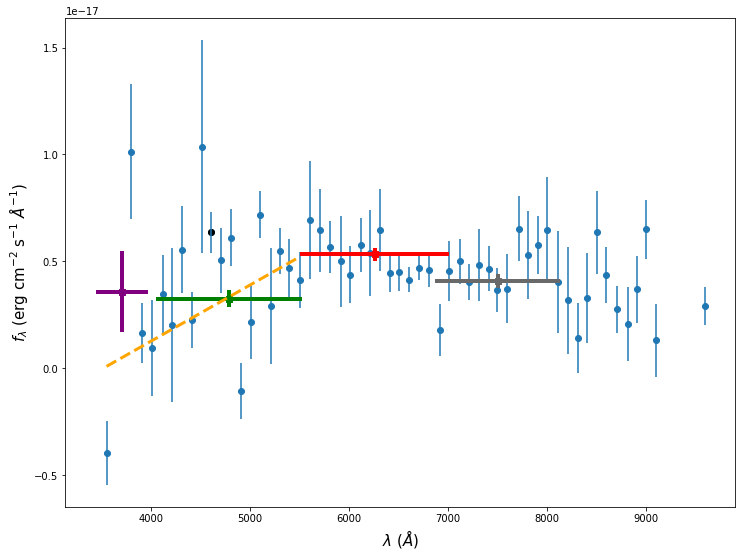

240614411


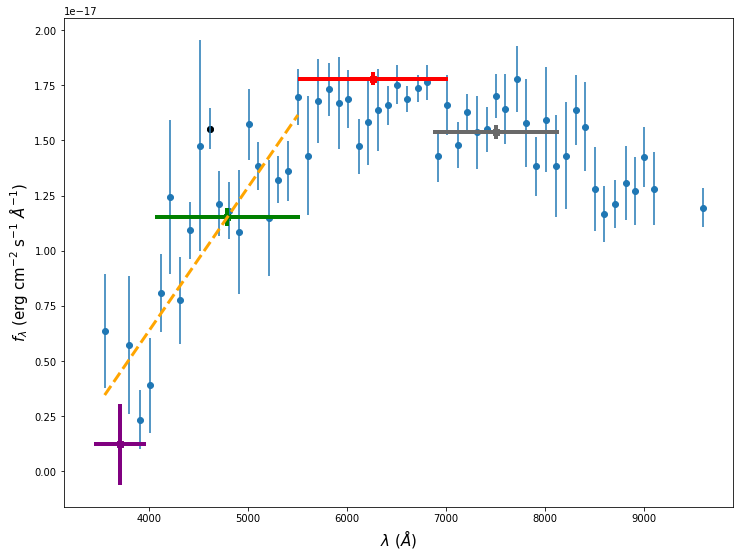

240614602


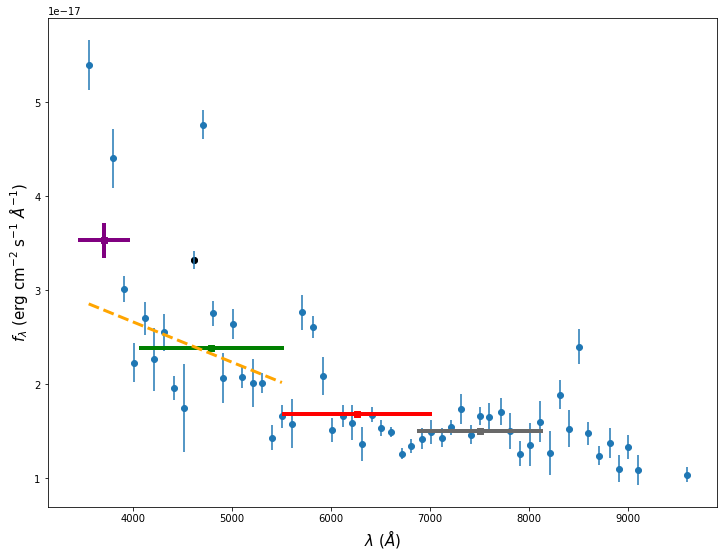

240614869


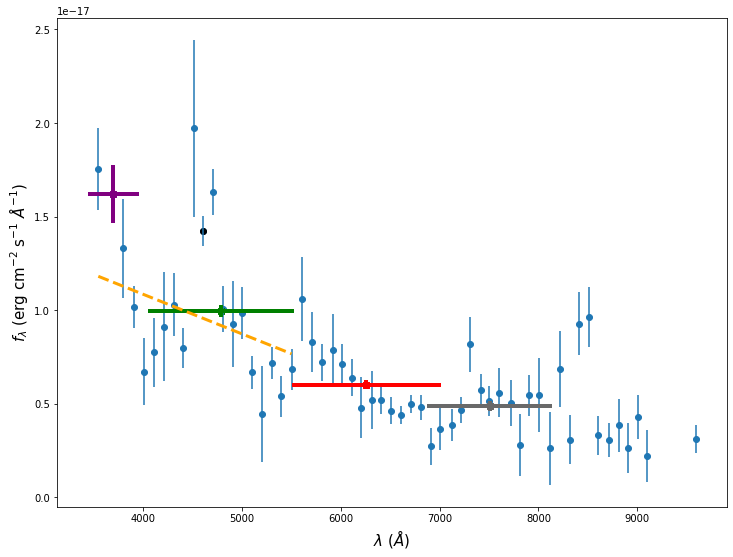

240614966


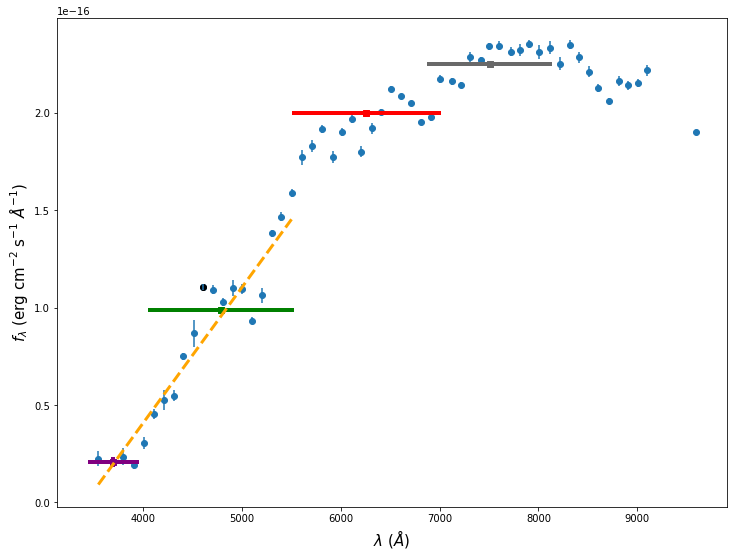

240614966


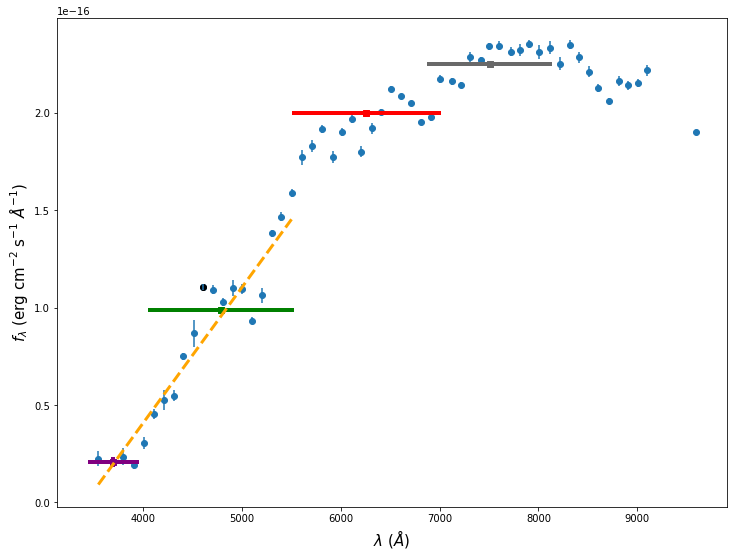

224113017


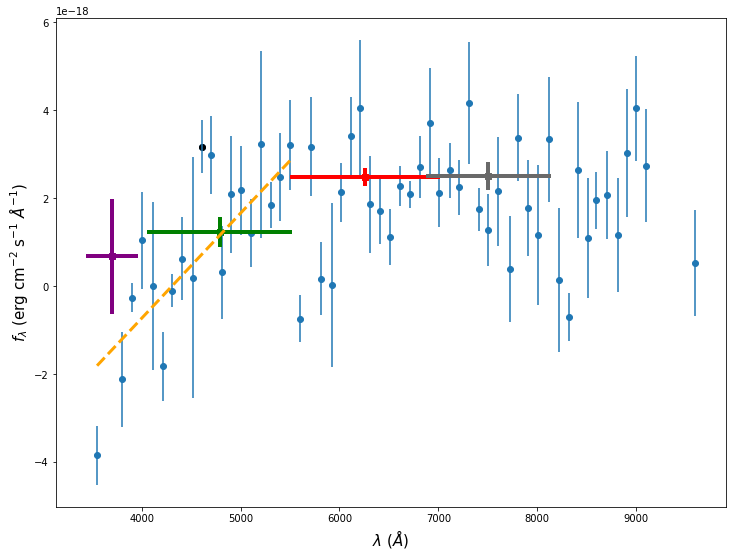

247004018


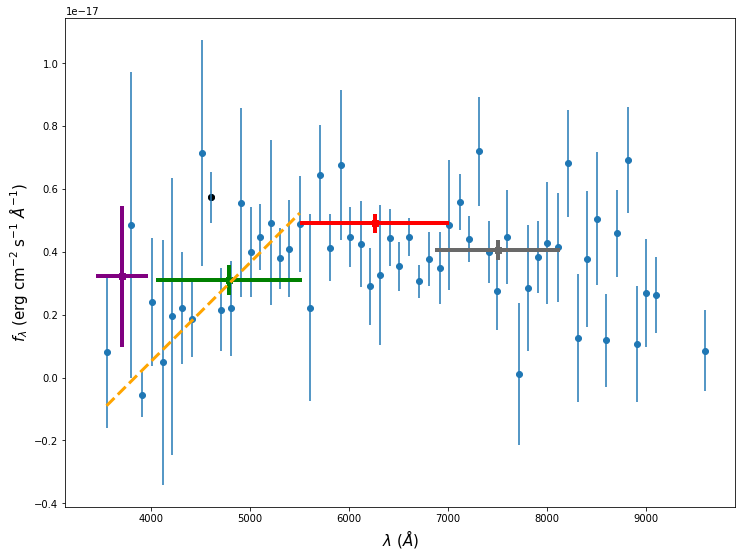

247004258


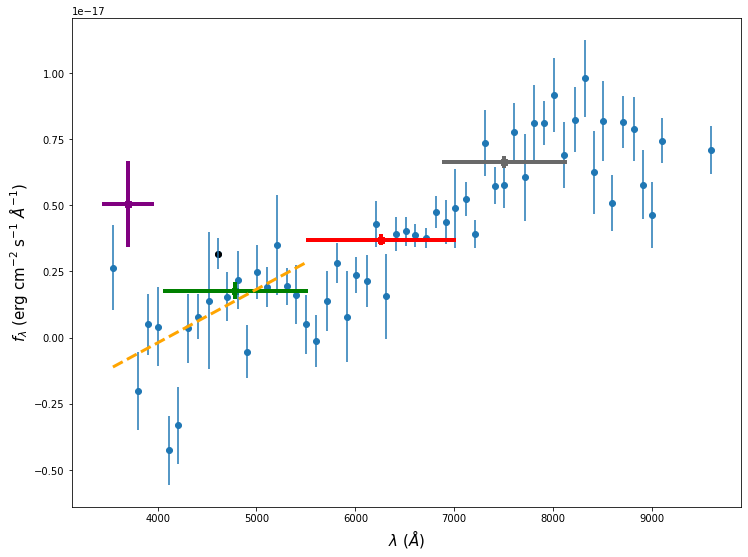

247004673


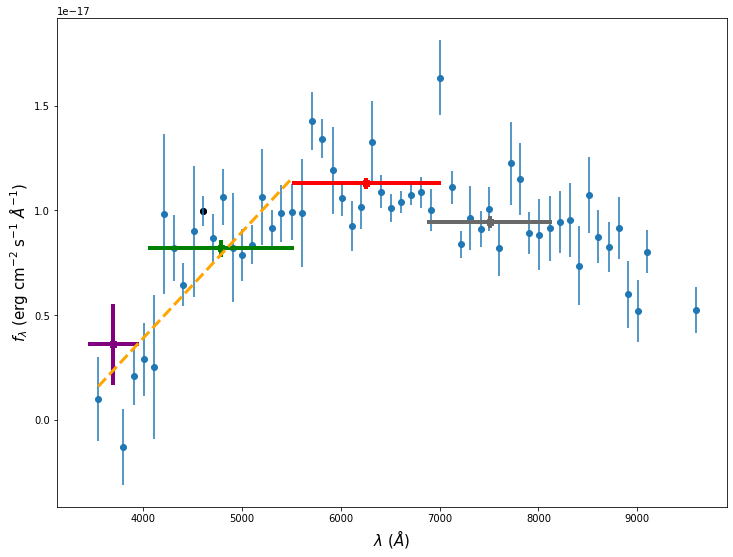

224114263


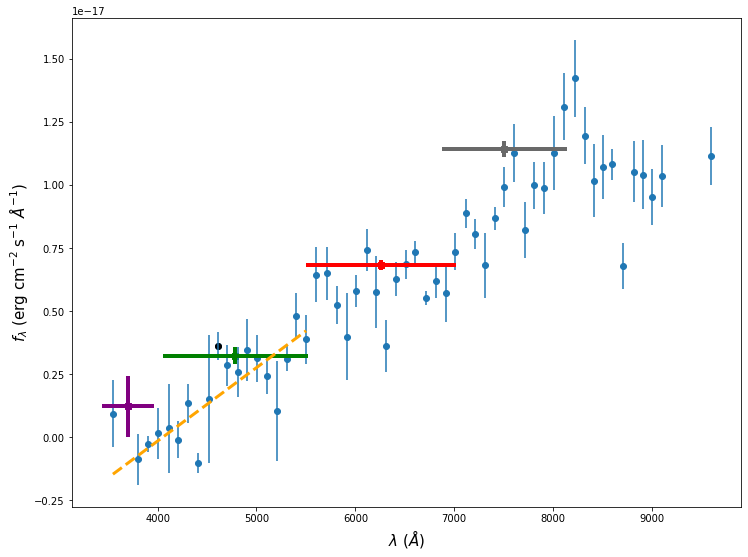

247004930


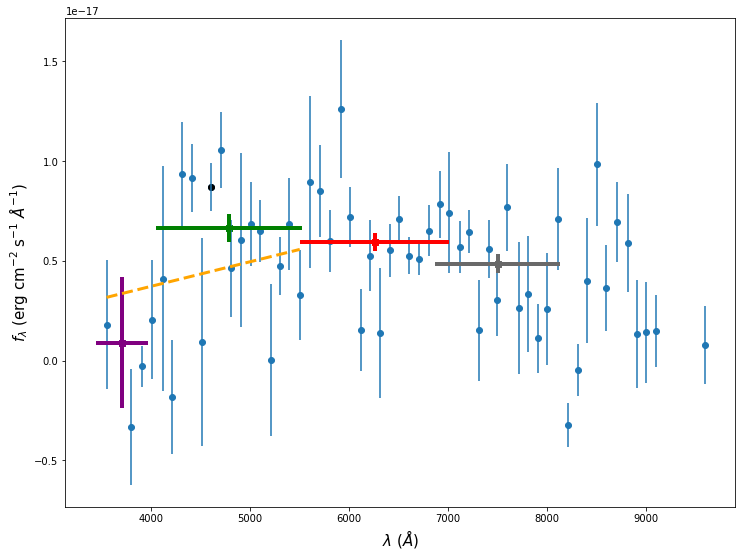

224115255


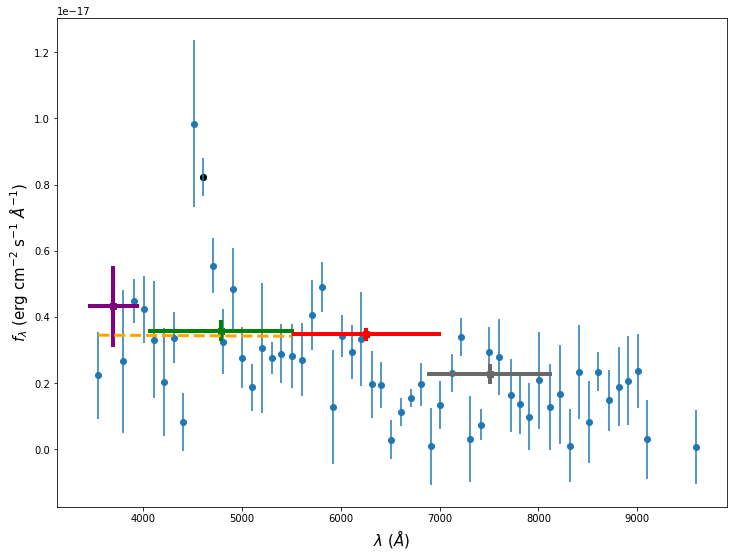

247007508


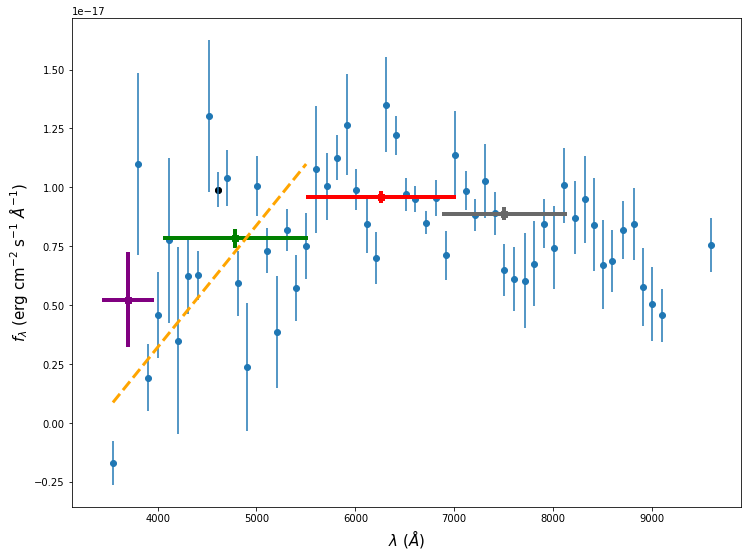

224117495


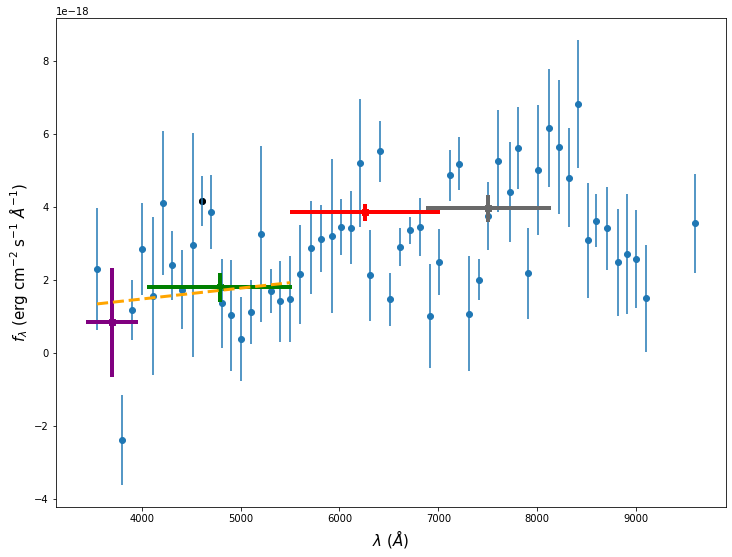

247008297


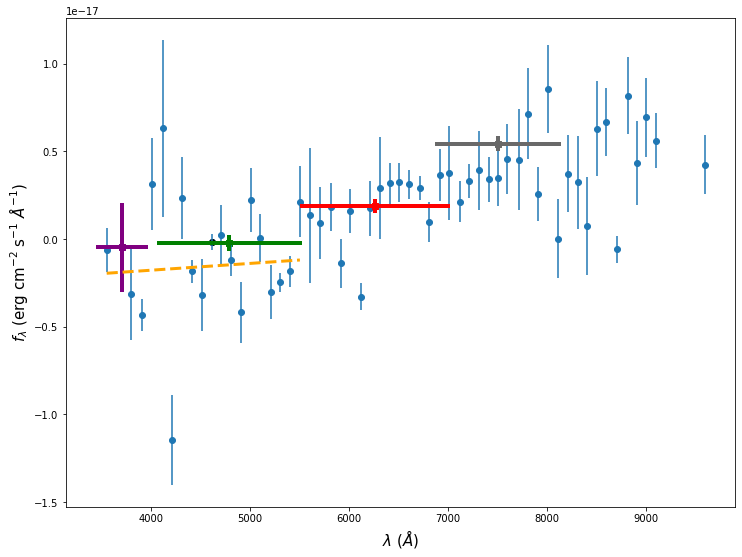

247008438


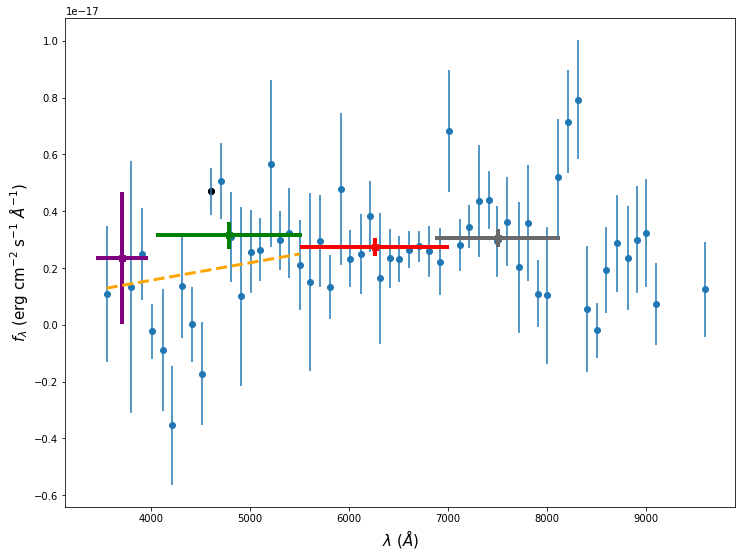

224118130


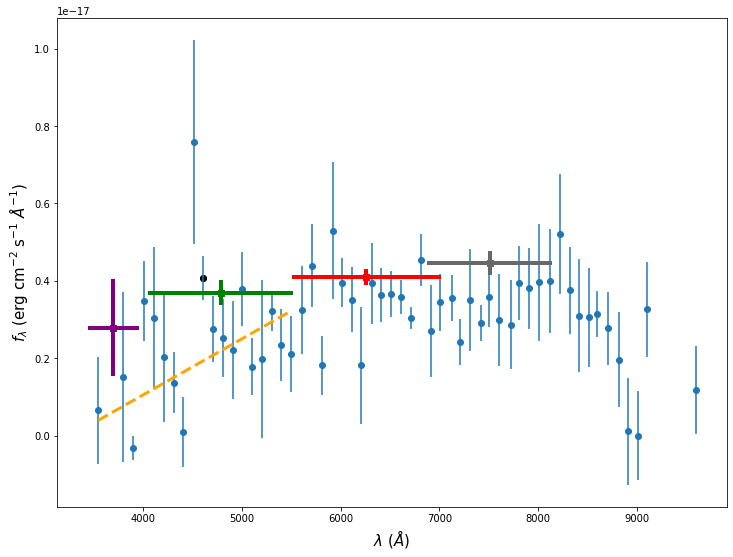

247009151


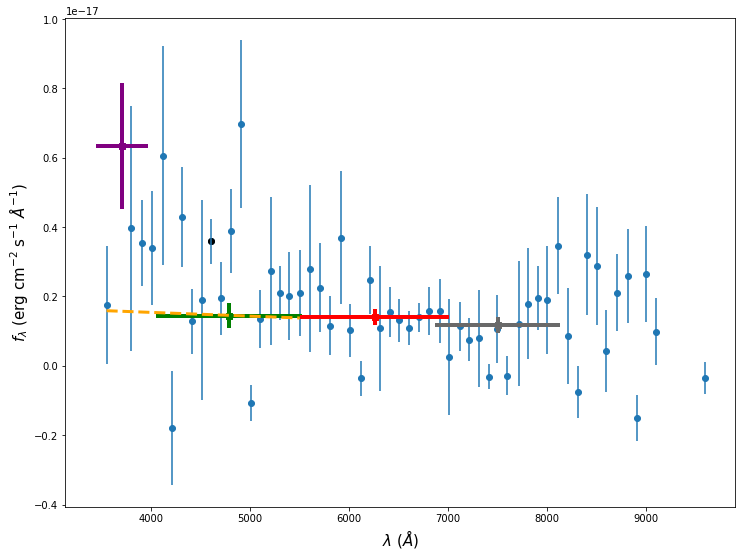

224119132


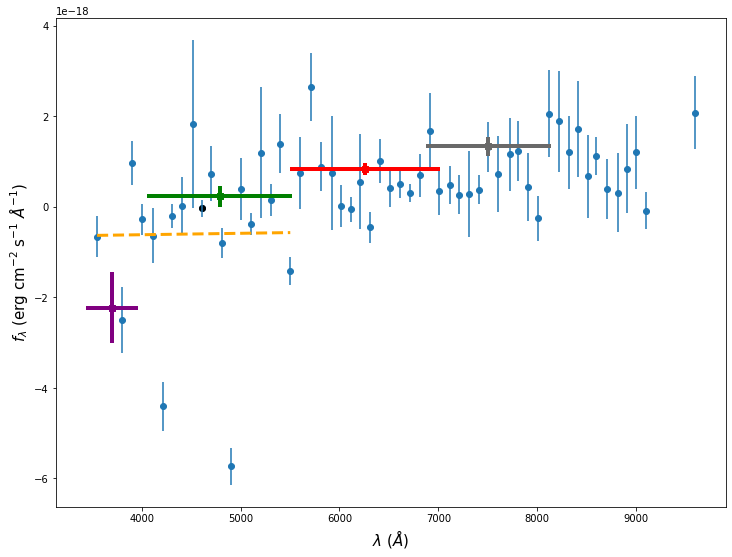

224119936


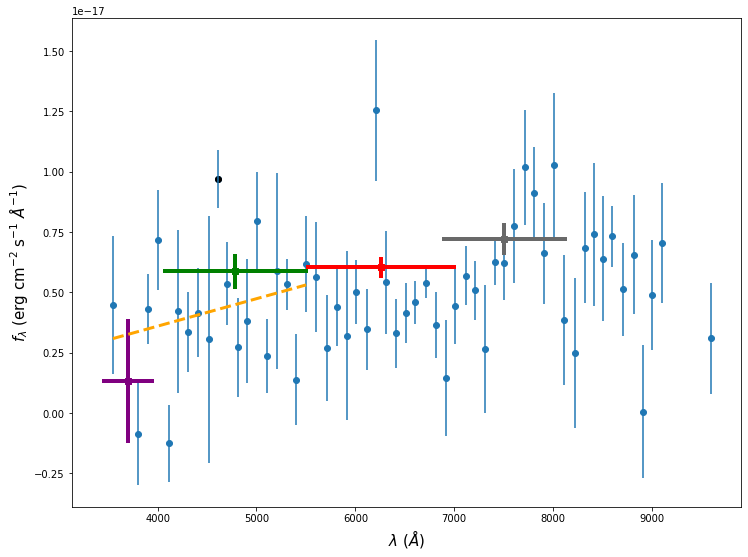

224120152


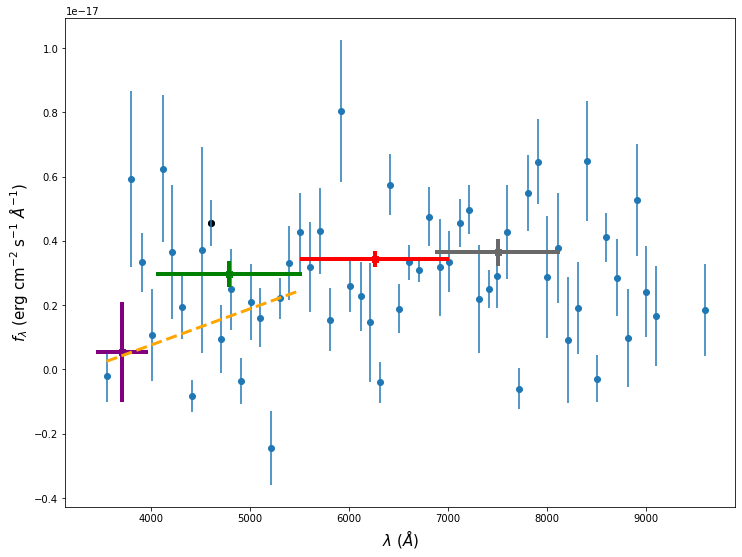

247012382


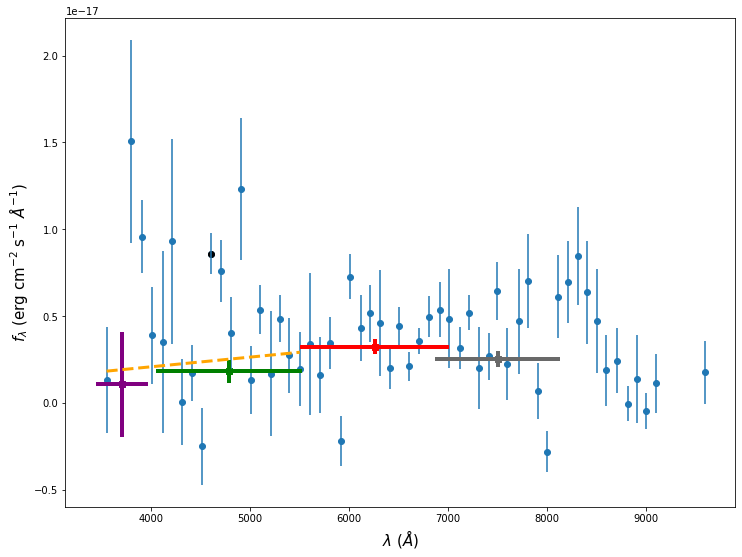

247014072


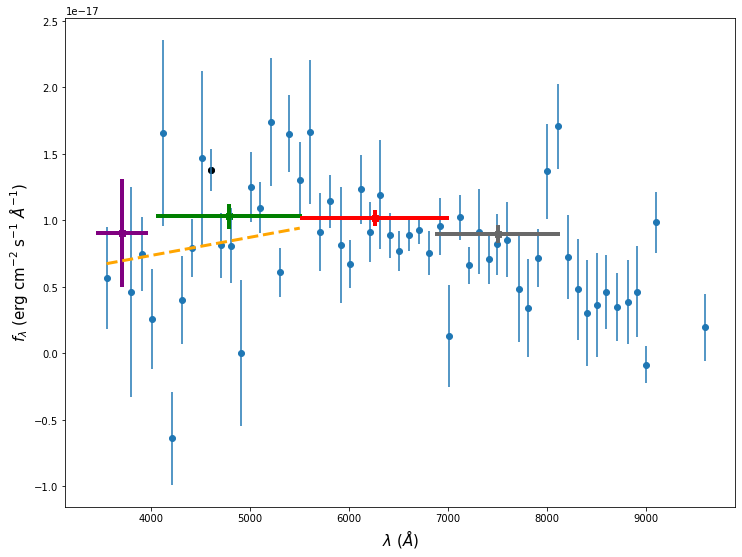

247014467


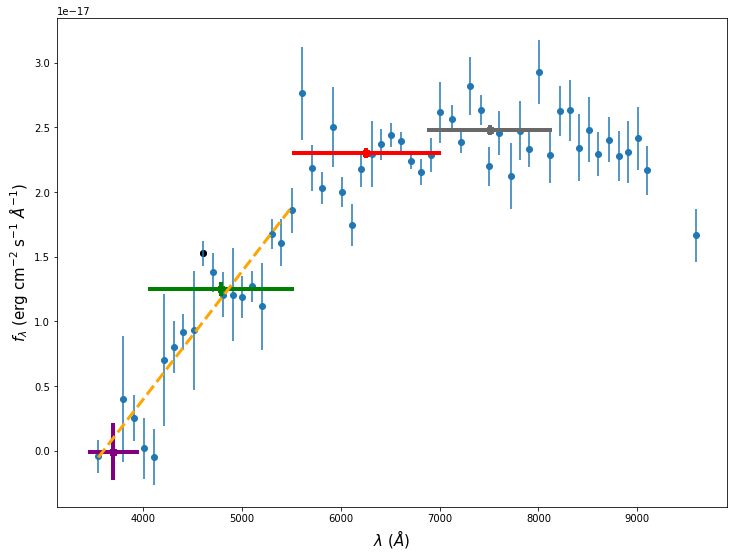

247014909


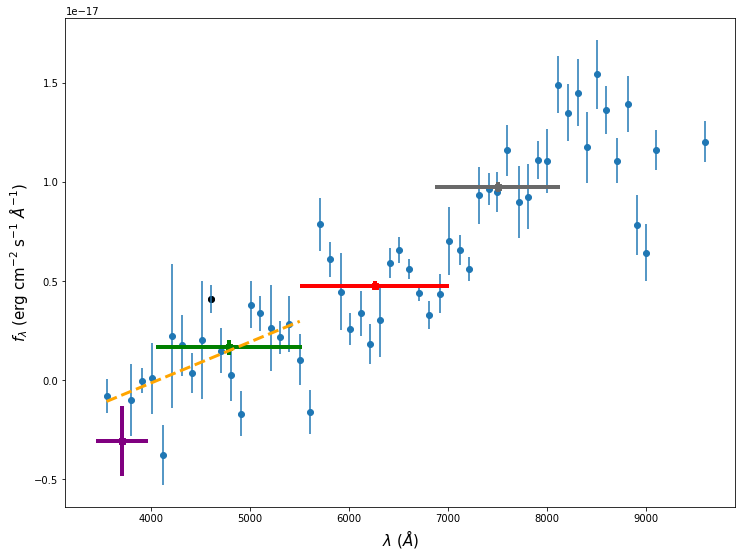

247015378


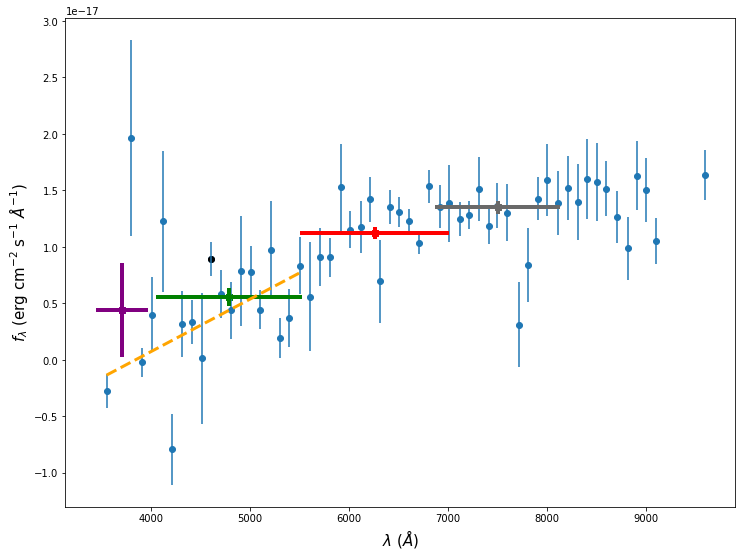

247015608


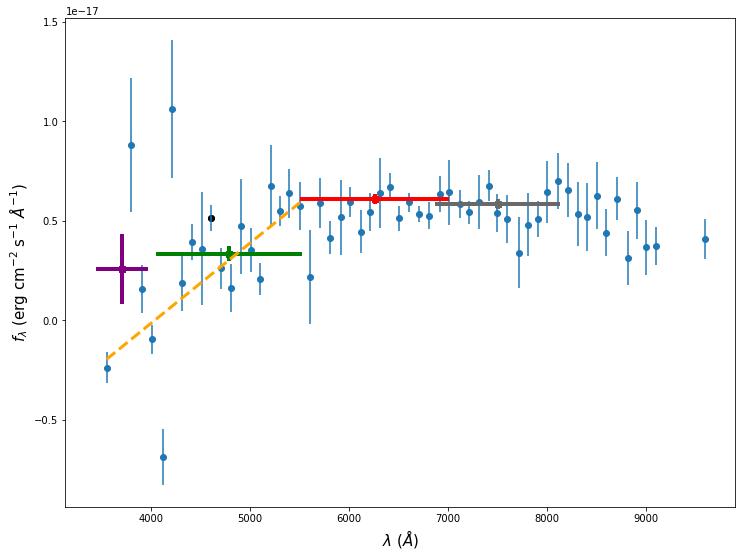

224302597


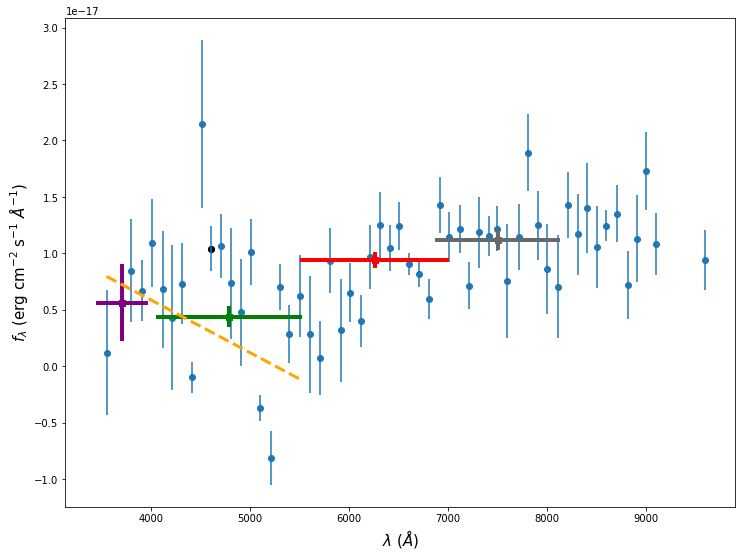

224307812


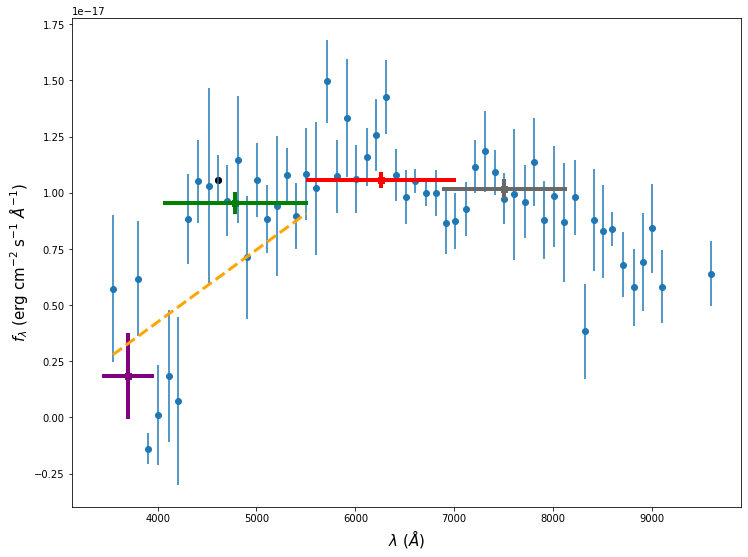

In [13]:
for i in range(len(line)):
    if ~line[i]: continue
        
    pm = pm_flx[i]
    errors = pm_err[i]
    cont_fit = cf[i]
    
    fig, ax = plt.subplots(figsize=(12,9))
    ax.scatter(w_central[:-3], pm[:-3])
    ax.errorbar(w_central[:-3], pm[:-3], yerr=errors[:-3], fmt='none')
    ax.scatter(w_central[nb_ind], pm[nb_ind], c='black')

    ax.scatter(w_central[-4], pm[-4], c='purple' , marker='s')
    ax.scatter(w_central[-3], pm[-3], c='green'  , marker='s')
    ax.scatter(w_central[-2], pm[-2], c='red'    , marker='s')
    ax.scatter(w_central[-1], pm[-1], c='dimgray', marker='s')

    ax.errorbar(w_central[-4], pm[-4], xerr=bb_fwhm[-4]/2, yerr = errors[-4],
                fmt='none', color='purple', elinewidth=4)
    ax.errorbar(w_central[-3], pm[-3], xerr=bb_fwhm[-3]/2, yerr = errors[-3],
                fmt='none', color='green', elinewidth=4)
    ax.errorbar(w_central[-2], pm[-2], xerr=bb_fwhm[-2]/2, yerr = errors[-2],
                fmt='none', color='red', elinewidth=4)
    ax.errorbar(w_central[-1], pm[-1], xerr=bb_fwhm[-1]/2, yerr = errors[-1],
                fmt='none', color='dimgray', elinewidth=4)

    ax.set_xlabel('$\lambda\ (\AA)$', size=15)
    ax.set_ylabel('$f_\lambda$ (erg cm$^{-2}$ s$^{-1}$ $\AA^{-1}$)', size=15)

    # Fit line
    w_fit_min = w_central[nb_ind - N_nb]
    w_fit_max = w_central[nb_ind + N_nb]
    x_fit = np.linspace(w_fit_min, w_fit_max, 1000)
    y_fit = cont_fit[1] + cont_fit[0]*x_fit
    ax.plot(x_fit,y_fit, c='orange', linestyle='dashed', linewidth=3)
    
    print(cat['number'][mask][i])

    plt.show()